# Pattern Recognition

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL

## Data preprocessing

In [2]:
train_dir = 'CN_dataset/Train'
validation_dir = 'CN_dataset/Test'

try_img = PIL.Image.open(train_dir+'/Normal/A-0.png')
try_img

In [3]:
print("Mode of the data: ", try_img.mode)
print("Size of Images: ", try_img._size)

Mode of the data:  L
Size of Images:  (28, 28)


In [4]:
import glob

print("Normal: ", len(glob.glob(train_dir+'/Normal/*')))
print("Corrected: ", len(glob.glob(train_dir+'/Corrected/*')))
print("Corrected: ", len(glob.glob(train_dir+'/*')))

Normal:  39334
Corrected:  65534
Corrected:  2


In [12]:
!pwd

/Users/Aabha/Desktop/Detecting-Dyslexia-at-an-early-stage


In [6]:
IMAGE_SIZE = try_img._size
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                    rotation_range=10,
                                    # zoom_range = 0.1,
                                    # width_shift_range=0.1,
                                    # height_shift_range=0.1
                                  )

train_generator = train_datagen.flow_from_directory(
    train_dir,   #path to the training dataset
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE, 
    class_mode ='binary')  #binary.. since we have two classes only

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode='binary')

Found 104868 images belonging to 2 classes.
Found 38842 images belonging to 2 classes.


## Model Architecture

In [7]:
INPUT_SHAPE = IMAGE_SIZE + (3, )
print(INPUT_SHAPE)

model = tf.keras.models.Sequential([                               
    tf.keras.layers.Conv2D(1, (3, 3), activation='relu', input_shape=INPUT_SHAPE, padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

(28, 28, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 1)         28        
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 6,317
Trainable params: 6,317
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer='adam', 
    metrics=['accuracy'])

In [9]:
STEPS_PER_EPOCH = 86115//BATCH_SIZE
VALIDATION_STEPS = 37439//BATCH_SIZE

In [10]:
history = model.fit(train_generator, 
            epochs=5,
            steps_per_epoch = STEPS_PER_EPOCH,
            validation_data = validation_generator,
            validation_steps = VALIDATION_STEPS, 
            verbose=1)

Epoch 1/5


/Users/Aabha/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2691/2691 [==============================] - 125s 46ms/step - loss: 0.3920 - accuracy: 0.8255 - val_loss: 0.3766 - val_accuracy: 0.8377
Epoch 2/5
2691/2691 [==============================] - 125s 46ms/step - loss: 0.3327 - accuracy: 0.8564 - val_loss: 0.4265 - val_accuracy: 0.8209
Epoch 3/5
2691/2691 [==============================] - 172s 64ms/step - loss: 0.3142 - accuracy: 0.8638 - val_loss: 0.4202 - val_accuracy: 0.8204
Epoch 4/5
2691/2691 [==============================] - 173s 64ms/step - loss: 0.3086 - accuracy: 0.8654 - val_loss: 0.3267 - val_accuracy: 0.8585
Epoch 5/5
2691/2691 [==============================] - 127s 47ms/step - loss: 0.3050 - accuracy: 0.8675 - val_loss: 0.3622 - val_accuracy: 0.8451


# Testing with custom input

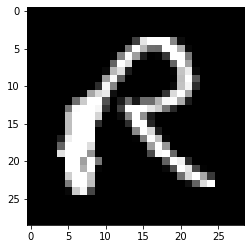

In [12]:
try_img = PIL.Image.open(validation_dir+'/Normal/A-102.png')
try_img

import cv2
img = cv2.imread(validation_dir+'/Corrected/4_1.png')
import matplotlib.pyplot as plt

plt.imshow(img)

In [13]:
img = cv2.resize(img,(28,28))
img.shape

(28, 28, 3)

In [14]:
import numpy as np

img = np.reshape(img,[1,28,28,3])

In [15]:
model.predict(img)

array([[0.539459]], dtype=float32)